In [74]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
from config import api_key


NameError: name 'config' is not defined

In [69]:
apikey



NameError: name 'apikey' is not defined

In [10]:
us_df = pd.read_csv('CE-Project-Data/CW_HistoricalEmissions_US.csv')
other_df = pd.read_csv('CE-Project-Data/CW_HistoricalEmissions_ClimateWatch.csv')
land_usage_df = pd.read_csv('CE-Project-Data/Agricultural_Land_Usage.csv')
pd.set_option('display.max_columns', None)

food_security_ghana = pd.read_csv('CE-Project-Data/food_security_ghana.csv')
food_security_usa = pd.read_csv('CE-Project-Data/food_security_usa.csv')

Text(0.5, 1.0, 'Food Insecurity Index')

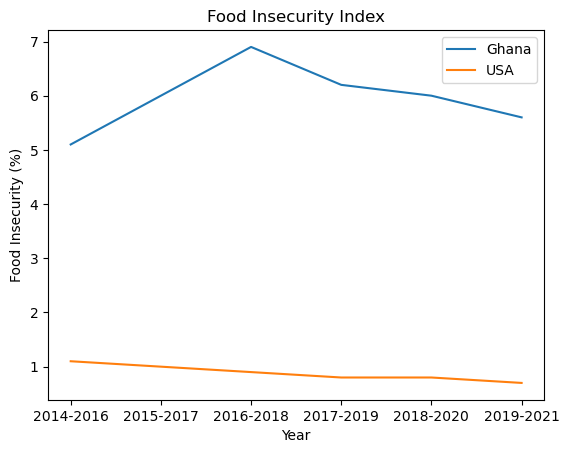

In [11]:
#Separate food insecurity data for usa and ghana for total population.

food_security_ghana_totalpop = food_security_ghana[food_security_ghana['Item Code']=='210401']                                            
food_security_usa_totalpop = food_security_usa[food_security_usa['Item Code']=='210401']


plt.plot(food_security_ghana_totalpop['Year'], food_security_ghana_totalpop['Value'], label="Ghana")
plt.plot(food_security_usa_totalpop['Year'], food_security_usa_totalpop['Value'], label="USA")
plt.legend(loc="best")
#plt.xticks(rotation=90)
plt.xlabel("Year")
plt.ylabel("Food Insecurity (%)")
plt.title("Food Insecurity Index")


In [12]:
ghana_df = other_df[other_df['Country']=='GHA']


In [ ]:
#insert drought data and compare 

Sector,Total excluding LUCF,Total including LUCF,Energy,Industrial Processes,Agriculture,Waste,Land-Use Change and Forestry,Bunker Fuels,Electricity/Heat,Building,Manufacturing/Construction,Transportation,Other Fuel Combustion,Fugitive Emissions
Gas,All GHG,All GHG,All GHG,All GHG,All GHG,All GHG,All GHG,All GHG,All GHG,All GHG,All GHG,All GHG,All GHG,All GHG
1990,11.89785,21.97162,3.555,0.860362,6.750394,0.73209,10.07377,0.1413,0.0443,1.398,0.3212,1.6642,0.1258,0.0014
1991,11.97765,22.05142,3.3261,0.894998,6.97973,0.77682,10.07377,0.1059,0.0526,1.29,0.3182,1.5445,0.1194,0.0013
1992,12.50742,22.5812,3.7686,1.076034,6.872989,0.7898,10.07377,0.138,0.0526,1.357,0.3697,1.8427,0.1452,0.0014
1993,12.72672,22.8005,3.8424,1.152871,6.909441,0.82201,10.07377,0.1187,0.0609,1.3966,0.3794,1.8556,0.1485,0.0015
1994,13.06458,23.13835,4.1365,1.084807,6.936529,0.90674,10.07377,0.138,0.0808,1.4749,0.434,1.9321,0.1743,0.0404
1995,13.41239,23.48836,4.4418,1.004543,6.981573,0.98447,10.07597,0.1798,0.0659,1.5559,0.4788,2.1046,0.1969,0.0396
1996,14.3345,24.37661,4.7796,1.113719,7.429977,1.0112,10.04212,0.1927,0.0558,1.6426,0.5237,2.2964,0.2162,0.045
1997,15.26237,25.68903,4.9336,1.287595,7.563491,1.47768,10.42667,0.1927,0.0318,1.6951,0.5404,2.3967,0.2226,0.0471
1998,17.97952,29.27568,6.8179,0.934672,8.672055,1.55489,11.29616,0.2795,1.2173,1.7899,0.6152,2.8597,0.2873,0.0486


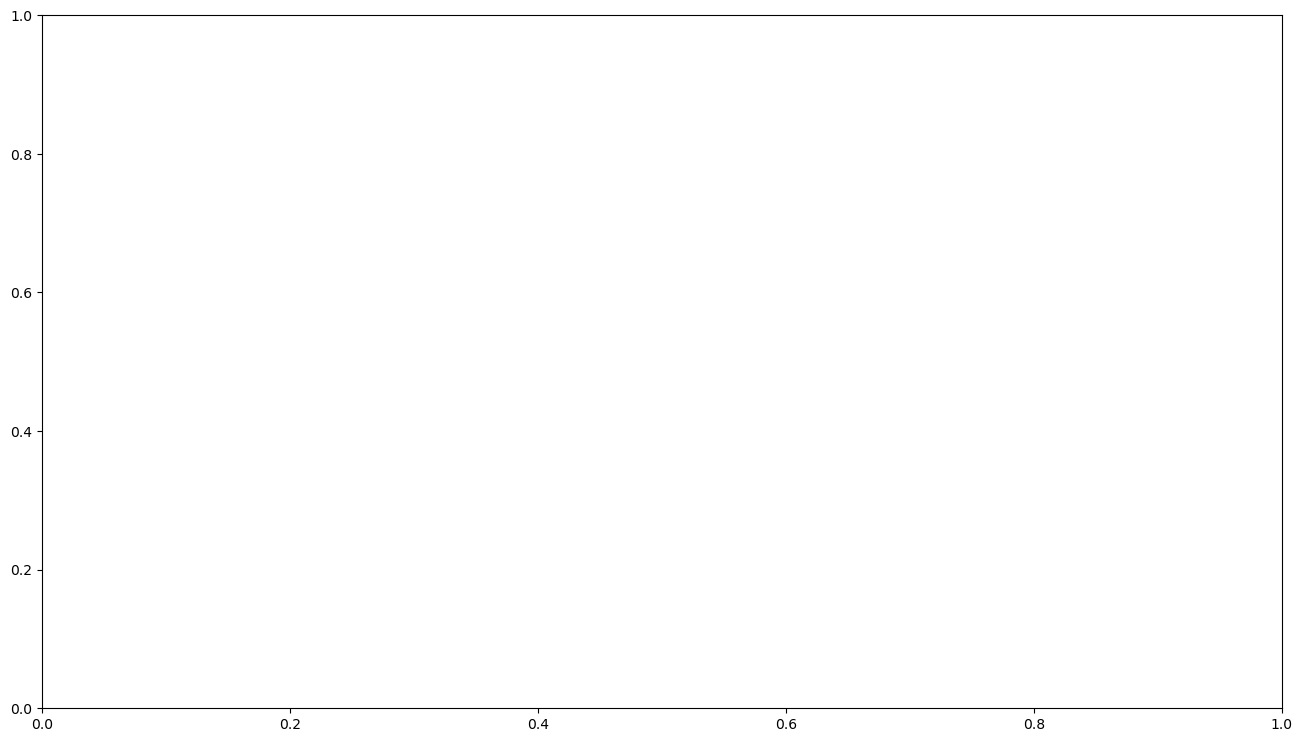

In [65]:
#separate US data by state, sector, and gas type. sum the total gas emissions for each year
#US data frames to use: us_df_state, us_df_sector, us_df_gas, us_df_sum
us_df_state = us_df.groupby(['State']).sum()
us_df_state = us_df_state.style.format('{:.3f}')
us_df_sector = us_df.groupby(['Sector']).sum()
us_df_sector = us_df_sector.style.format('{:.3f}')
us_df_gas = us_df.groupby(['Gas']).sum()
us_df_sum = pd.DataFrame(us_df_gas.sum(axis=0)).T.rename(index={0:'US Total'}).style.format('{:.3f}')
us_df_gas = us_df_gas.style.format('{:.3f}')

#"all ghg" row needs to be filtered first for usa total

us_ghg=us_df[us_df['Gas']=='All GHG']

#filter agriculture sector for usa
us_ghg2=us_ghg[us_ghg['Sector'].str.contains('Agriculture')]

#total GHG emissions for Agriculture
us_ghg_total= us_ghg2[us_ghg2['State']=="USA"]

#Display all GHG by sector for USA

us_sectors= us_df[us_df['State']=='USA']
ghg_us_sectors= us_sectors[us_sectors['Gas']=='All GHG']

#Display all GHG by sector for Ghana
ghg_ghana_sectors= ghana_df[ghana_df['Gas']=='All GHG']





In [103]:
#separate Ghana data by sector and gas type. Sum the total gas emissions for each year
#Ghana data frames to use: ghana_df_sector, ghana_df_gas, ghana_df_sum
ghana_df_sector = ghana_df.groupby(['Sector']).sum()
ghana_df_sector = ghana_df_sector.style.format('{:.3f}')
ghana_df_gas = ghana_df.groupby(['Gas']).sum()
ghana_df_sum = pd.DataFrame(ghana_df_gas.sum(axis=0)).T.rename(index={0:'Ghana Total'}).style.format('{:.3f}')
ghana_df_gas = ghana_df_gas.style.format('{:.3f}')


#Filter Ghanas agriculture sector and all ghg emissions
gh_ghg=ghana_df[ghana_df['Sector'].str.contains('Agriculture')]

gh_ghg_total=gh_ghg[gh_ghg['Gas']=='All GHG']

#gh_ghg_total



Text(0.5, 1.0, 'Total Greenhouse Emissions from Agriculture')

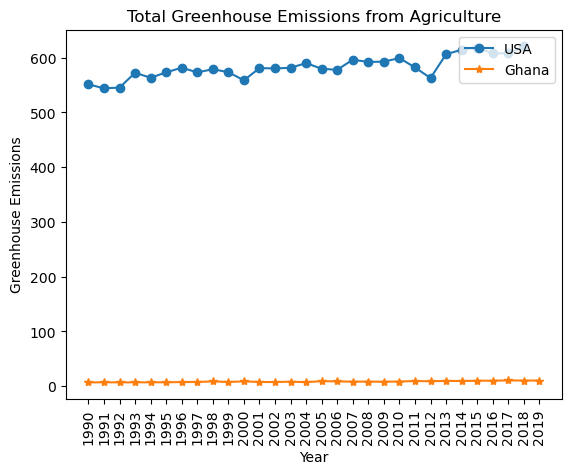

In [110]:
#compare ghanas and usa's total agriculture ghg emissions with a line graph 

usaghg= us_ghg_total.T
head_us=usaghg.iloc[1]
usaghg=usaghg[4:]
usaghg.columns=head_us

ghghg= gh_ghg_total.T
head_gh=ghghg.iloc[1]
ghghg=ghghg[4:]
ghghg.columns=head_gh


plt.plot(usaghg, label='USA', marker='o')
plt.plot(ghghg, label='Ghana', marker='*')
plt.legend(loc="upper right")
plt.xticks(rotation=90)
plt.xlabel("Year")
plt.ylabel("Greenhouse Emissions")
plt.title("Total Greenhouse Emissions from Agriculture")



In [14]:
#clean land usage data by getting rid of unnecessary columns
land_usage_df = land_usage_df.drop(land_usage_df.columns[3:34], axis=1)
land_usage_df = land_usage_df.drop(columns=['Country Code','2020','2021','Unnamed: 66'])
land_usage_df.head(2)



,Country Name,Indicator Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,Agricultural land (% of land area),11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111
1,Africa Eastern and Southern,Agricultural land (% of land area),44.077433,44.175529,44.364624,43.405047,43.602308,43.786737,43.940969,44.096712,44.238249,44.453834,44.613694,44.754313,44.892132,45.218702,44.973395,45.150072,45.347753,45.511698,45.676483,45.943486,46.156943,46.361515,43.388794,43.524271,43.674175,43.772496,43.901452,44.045088,44.168345,44.194846


In [115]:
#separate out Ghana and USA land usage data
#Land Usage DataFrames to use: land_usage_gha_df, land_usage_usa_df
land_usage_gha_df = land_usage_df[land_usage_df['Country Name']=='Ghana']
land_usage_usa_df = land_usage_df[land_usage_df['Country Name']=='United States']
land_usage_df

,Country Name,Indicator Name,1990
0,Aruba,Agricultural land (% of land area),11.111111
1,Africa Eastern and Southern,Agricultural land (% of land area),44.077433
2,Afghanistan,Agricultural land (% of land area),58.322984
3,Africa Western and Central,Agricultural land (% of land area),35.127197
4,Angola,Agricultural land (% of land area),36.421930
...,...,...,...
261,Kosovo,Agricultural land (% of land area),NaN
262,"Yemen, Rep.",Agricultural land (% of land area),44.748755
263,South Africa,Agricultural land (% of land area),78.807013
264,Zambia,Agricultural land (% of land area),27.994727


Text(0.5, 1.0, '% of Land Area used for Agriculture')

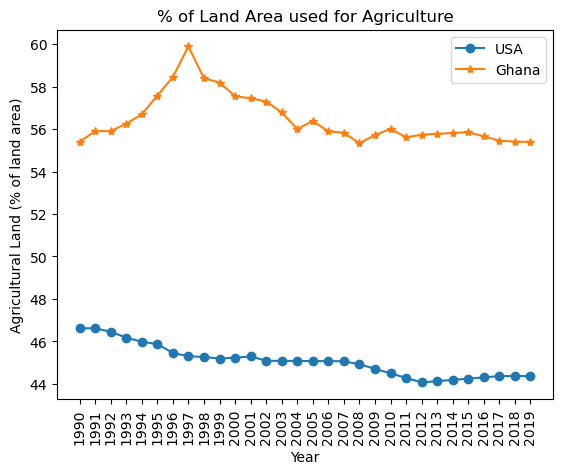

In [14]:
#create a line graph visualizing land use 

usaland_transposed= land_usage_usa_df.T
head=usaland_transposed.iloc[1]
usaland_transposed=usaland_transposed[2:]
usaland_transposed.columns=head

usaland_transposed

ghland_transposed=land_usage_gha_df.T
head2=ghland_transposed.iloc[1]
ghland_transposed=ghland_transposed[2:]
ghland_transposed.columns=head

plt.plot(usaland_transposed, label='USA', marker='o')
plt.plot(ghland_transposed, label='Ghana', marker='*')
plt.legend(loc="upper right")
plt.xticks(rotation=90)
plt.xlabel("Year")
plt.ylabel("Agricultural Land (% of land area)")
plt.title("% of Land Area used for Agriculture")

